<a href="https://colab.research.google.com/github/geebson/WindFarm/blob/main/Wind_Farm_Location.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade geopandas
!pip install --upgrade geodatasets
!pip install folium matplotlib mapclassify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.0 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.13.2
    Uninstalling geopandas-0.13.2:
      Successfully uninstalled geopandas-0.13.2


# Y Value of "Location Name"

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
#windfarm capacity data link
#https://raw.githubusercontent.com/geebson/WindFarm/main/US%20WindFarm%20Location.csv
#https://drive.google.com/drive/folders/1rLmOPqmj_x2KAX2woxkFhH30rLET6cUz?usp=sharing << link to google drive folder.

# IMPORTANT: you may need to change the pathway for your own drive.

from google.colab import drive
drive.mount('/content/drive')

data_path = "/content/drive/My Drive/FoundationsData_WindFarm/"
myfile = "{}weatherdata.csv".format(data_path)
df = pd.read_csv(myfile)
df = df.fillna(0)
display(df.head(5))

display(df["NAME"].unique())
df["NAME"].value_counts()[0:10]

X_train = df[["ELEVATION", "AWND", "PRCP", "TMAX", "TMIN", "WT01", "WT02", "WT03", "WT04", "WT05", "WT06", "WT08", "WT09"]]
y_train = df["NAME"]

col_transformer = make_column_transformer(
    (StandardScaler(with_mean=False), ["ELEVATION", "AWND", "PRCP", "TMAX", "TMIN", "WT01", "WT02", "WT03", "WT04", "WT05", "WT06", "WT08", "WT09"]),
    remainder="drop"
)

test_accuracy = pd.Series([])
for k in range(1, 51):
  pipeline_knn = make_pipeline(
      col_transformer,
      KNeighborsClassifier(n_neighbors=k)
  )
  scores = cross_val_score(
      pipeline_knn,
      X=X_train,
      y=y_train,
      cv=10,
      scoring="accuracy",
      error_score="raise"
  )
  accuracy = scores
  test_accuracy[k] = accuracy.mean()
print(test_accuracy.min())
print(test_accuracy.idxmin())

Mounted at /content/drive


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PRCP,TMAX,TMIN,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
0,USW00093736,"CHARLOTTESVILLE ALBEMARLE AIRPORT, VA US",38.1374,-78.45513,192.3,1/1/2023,3.80,0.0,69.0,46.0,1,1,0,0,0,0,1,0
1,USW00093736,"CHARLOTTESVILLE ALBEMARLE AIRPORT, VA US",38.1374,-78.45513,192.3,1/2/2023,4.70,0.0,69.0,45.0,0,0,0,0,0,0,0,0
2,USW00093736,"CHARLOTTESVILLE ALBEMARLE AIRPORT, VA US",38.1374,-78.45513,192.3,1/3/2023,10.96,0.0,71.0,52.0,1,0,0,0,0,0,0,0
3,USW00093736,"CHARLOTTESVILLE ALBEMARLE AIRPORT, VA US",38.1374,-78.45513,192.3,1/4/2023,7.38,0.0,65.0,56.0,0,0,0,0,0,0,0,0
4,USW00093736,"CHARLOTTESVILLE ALBEMARLE AIRPORT, VA US",38.1374,-78.45513,192.3,1/5/2023,2.91,0.0,67.0,45.0,1,0,0,0,0,0,0,0


array(['CHARLOTTESVILLE ALBEMARLE AIRPORT, VA US',
       'WASHINGTON DULLES INTERNATIONAL AIRPORT, VA US',
       'LYNCHBURG REGIONAL AIRPORT, VA US',
       'WAKEFIELD MUNICIPAL AIRPORT, VA US',
       'WASHINGTON REAGAN NATIONAL AIRPORT, VA US',
       'NEWPORT NEWS INTERNATIONAL AIRPORT, VA US',
       'ASHLAND HANOVER CO MUNICIPAL AIRPORT, VA US',
       'ROANOKE BLACKSBURG REGIONAL AIRPORT, VA US',
       'RICHMOND INTERNATIONAL AIRPORT, VA US',
       'DANVILLE REGIONAL AIRPORT, VA US',
       'NORFOLK INTERNATIONAL AIRPORT, VA US',
       'HAMPTON ROADS EXECUTIVE AIRPORT, VA US',
       'CHESTERFIELD CO AIRPORT, VA US'], dtype=object)

0.4672352369642664
50


<Axes: >

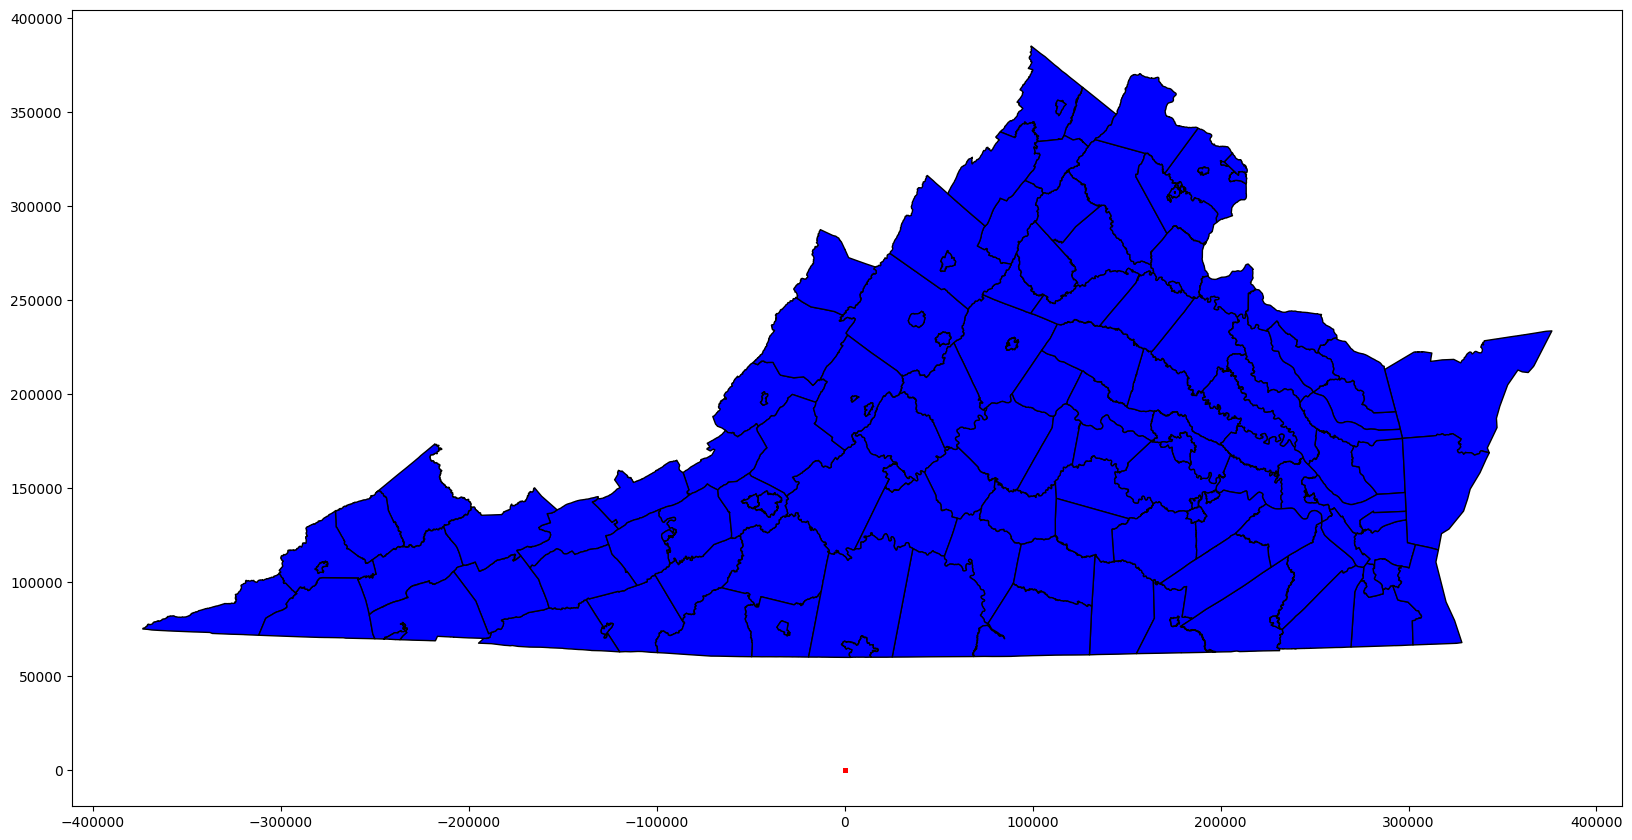

In [ ]:
import plotly.express as px
import geopandas
import geodatasets

mapfile = "{}VirginiaCounty.shx".format(data_path)
df_geo_real = geopandas.GeoDataFrame(df[["LATITUDE", "LONGITUDE"]], geometry = geopandas.points_from_xy(
    df.LONGITUDE, df.LATITUDE))
df_geo = geopandas.GeoDataFrame(df[["LATITUDE", "LONGITUDE"]], geometry = geopandas.points_from_xy(
    df.LONGITUDE, df.LATITUDE))
df_geo
world_data = geopandas.read_file(mapfile)
axis = world_data.plot(
color = 'blue', edgecolor = 'black',figsize = (20,20))
df_geo.plot(ax = axis, color = 'red', markersize = 5)

In [ ]:
df_geo

,LATITUDE,LONGITUDE,geometry
0,38.1374,-78.45513,POINT (-78.45513 38.13740)
1,38.1374,-78.45513,POINT (-78.45513 38.13740)
2,38.1374,-78.45513,POINT (-78.45513 38.13740)
3,38.1374,-78.45513,POINT (-78.45513 38.13740)
4,38.1374,-78.45513,POINT (-78.45513 38.13740)
...,...,...,...
4712,37.4000,-77.51700,POINT (-77.51700 37.40000)
4713,37.4000,-77.51700,POINT (-77.51700 37.40000)
4714,37.4000,-77.51700,POINT (-77.51700 37.40000)
4715,37.4000,-77.51700,POINT (-77.51700 37.40000)


In [ ]:
df_geo2 = df_geo[["LATITUDE", "LONGITUDE"]]
#scaling
df_geo2["LATITUDE"] = df_geo2["LATITUDE"] - 35.965656
df_geo2["LONGITUDE"] = df_geo2["LONGITUDE"] - 79.453564
df_geo2

<ipython-input-8-e4f2b99b7000>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo2["LATITUDE"] = df_geo2["LATITUDE"] - 35.965656
<ipython-input-8-e4f2b99b7000>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo2["LONGITUDE"] = df_geo2["LONGITUDE"] - 79.453564


,LATITUDE,LONGITUDE
0,2.171744,-157.908694
1,2.171744,-157.908694
2,2.171744,-157.908694
3,2.171744,-157.908694
4,2.171744,-157.908694
...,...,...
4712,1.434344,-156.970564
4713,1.434344,-156.970564
4714,1.434344,-156.970564
4715,1.434344,-156.970564


In [ ]:
X_train = df[["ELEVATION", "AWND", "PRCP", "TMAX", "TMIN", "WT01", "WT02", "WT03", "WT04", "WT05", "WT06", "WT08", "WT09"]]
y_train = df[["LATITUDE", "LONGITUDE"]]

col_transformer = make_column_transformer(
    (StandardScaler(with_mean=False), ["ELEVATION", "AWND", "PRCP", "TMAX", "TMIN", "WT01", "WT02", "WT03", "WT04", "WT05", "WT06", "WT08", "WT09"]),
    remainder="drop"
)

test_error = pd.Series([])
for k in range(1, 51):
  pipeline_knn = make_pipeline(
      col_transformer,
      KNeighborsRegressor(n_neighbors=k)
  )
  scores = cross_val_score(
      pipeline_knn,
      X=X_train,
      y=y_train,
      cv=10,
      scoring="neg_mean_squared_error",
      error_score="raise"
  )
  error = scores
  test_error[k] = error.mean()
print(test_error.max())
print(test_error.idxmax())

-0.5401200280603906
28


# Y Value of "Longitude, Latitude"

WIND FARM DATA

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/geebson/WindFarm/main/US%20WindFarm%20Location.csv"
#key documentation link: https://eerscmap.usgs.gov/uswtdb/api-doc/#keyValue
wind_df = pd.read_csv(url)
#select features
wind_df.head(5)
select_df = wind_df[["p_name", "t_state", "t_county", "p_cap", "p_tnum"]]
select_df = select_df.dropna(axis="rows",subset="p_cap")
select_df = select_df.drop_duplicates(subset="p_name")
select_df['efficiency'] = select_df['p_cap']/select_df['p_tnum']
select_df = select_df.sort_values(by=["p_cap"], ascending=False)
select_df.head(10)
#drop duplicate data
select_df=select_df.drop([70614,27317])
#print(select_df.head(10))

#Weather data of these top 10 wind farms:
weather_url = "https://raw.githubusercontent.com/geebson/WindFarm/main/Top%2010%20WindFarm%20Weather.csv"
weather_df = pd.read_csv(weather_url)
weather_df = weather_df.dropna(subset="AWND")
print(weather_df["NAME"].unique())

['MOUNTAINAIR 8 NW, NM US' 'CLINES CORNERS, NM US'
 'GRAHAM MUNICIPAL AIRPORT, TX US']
